# Project Goal: Sentiment Analysis on Amazon Reviews

This project will cover sentiment analysis in python using: NLTK - VADER

## Natural Language Tool Kit (NLTK)

#### Step 1 - setting up the environment/data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import nltk

In [2]:
# Load data
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [3]:
# Preview of data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# This time, checking the first entry in the "Text" column (i.e. the first customer review). 
#This is the row that I will be running the sentiment analysis on.
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
# The data size is massive so, for the sake of efficiency, trimming down the volumn of data
df = df.head(1000)
print(df.shape)
df.head()

(1000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


##### Explatory Data Analysis (EDA)

In [6]:
df["Score"].value_counts()

Score
5    642
4    138
1     98
3     75
2     47
Name: count, dtype: int64

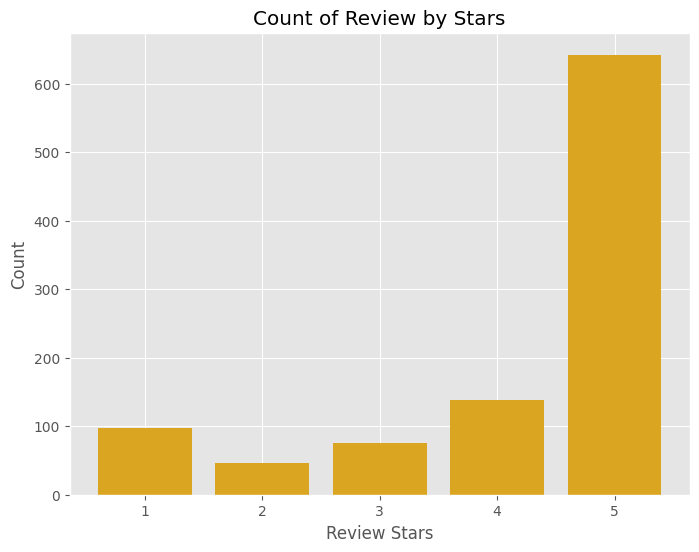

In [7]:
# Plot a bar chart
counts = df["Score"].value_counts().sort_index()

plt.figure(figsize=(8, 6)) 
plt.bar(counts.index, counts.values,color='goldenrod')
plt.title("Count of Review by Stars")
plt.xlabel("Review Stars")
plt.ylabel("Count")
plt.show()

#### Step 2: VADER Sentiment Scoring

Goal: use NLTK's `SentimentIntensityAnalyzer` to get the scores of the "Text"

- `SentimentIntensityAnalyzer` is part of the VADER (Valence Aware Dictionary and sEntiment Reasoner)
- `.polarity_scores`: Return a float for sentiment strength based on the input text.
    - This returns a dictionary containing: negative sentiment proportion (neg), neutral sentiment proportion (neu), positive sentiment proportion (pos), and overall sentiment score (compount).
    - The return ranges from 0 to 1 for each of *neg*, *neu* and *pos*. The sum across neg, neu and pos always equal 1.
    - The return ranges from -1 to 1 for *compound*, with the sign corresponding to the overall sentiment.

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # For adding progress bars to loops, etc

sia = SentimentIntensityAnalyzer() # Create a sia object that can be run on different text

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
# Demonstration of .polarity_scores()works - using a positive message.
sia.polarity_scores("Today is a good day!")

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}

In [10]:
# Demonstration of .polarity_scores()works - using a negative message.
sia.polarity_scores("This past week has been the worst week of my life.")

{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.6249}

In [11]:
# Now, run the polarity score on the entire dataset.
score_result = {}

# Run a for loop to store the ID and Polarity Score of each text into a new dictionary
for i, row in tqdm(df.iterrows(),total = len(df)):
    text = row["Text"]
    ID = row["Id"]
    score_result[ID] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
# Create a new df based on the new dict, rename the index, and then merge original data into the new df
vaders = pd.DataFrame(score_result).T
vaders = vaders.reset_index().rename(columns = {"index":"Id"}) # Update the "Id" so we can merge
vaders = vaders.merge(df,how = "left") # Perform merge.

In [13]:
# Now vaders contains the original data in addition to the sentiment scores.
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Step 3: Plotting the VADER Sentiment Scoring against Amazon Review Stars
- Hypothesis: we should see a correleation between the number of the stars left by the reviewer and the corresponding VADER sentiment score.


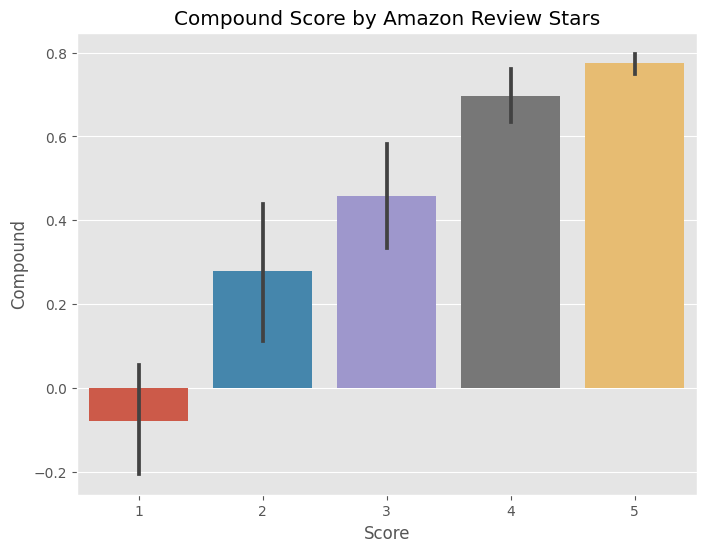

In [14]:
# Plot a chart to run a quick check on if sentiment score corresponds to the Stars left by the reviewer
plt.figure(figsize=(8,6))
barplt = sns.barplot(data = vaders, x = "Score", y = "compound")
barplt.set_title("Compound Score by Amazon Review Stars")
barplt.set_ylabel("Compound")
plt.show()

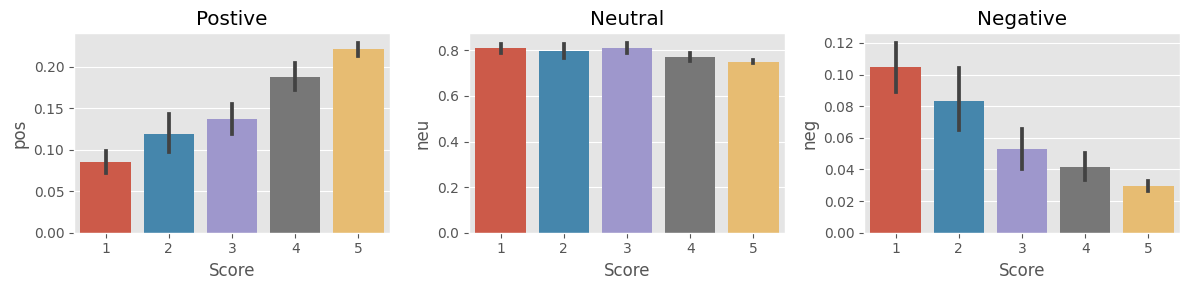

In [15]:
fit, axs = plt.subplots(1, 3, figsize = (12,3))
sns.barplot(data = vaders, x = "Score", y = "pos", ax = axs[0])
sns.barplot(data = vaders, x = "Score", y = "neu", ax = axs[1])
sns.barplot(data = vaders, x = "Score", y = "neg", ax = axs[2])
axs[0].set_title("Postive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()

### Summary:

**The Good and the Bad:**  
Overall, the VADER approach appears to be working well, with bar plots confirming the correlation as expected. We see that the higher the star ratings, the more likely the higher the VADER sentiment analysis.

VADER approach does a decent job. However, it is important to note that while VADER does a good job scoring each word, it is agnostic about the the relationships between the words.